In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
with open('results_directed.pkl', mode='rb') as rfd:
    df_metrics_directed, df_seqs_directed = pickle.load(rfd)

In [4]:
with open('results_random.pkl', mode='rb') as rfr:
    df_metrics_random, df_seqs_random = pickle.load(rfr)

In [5]:
missing_seqspace = 20807759

In [6]:
df_metrics_directed

,sampling,precision,recall,search_space
0,1.000,0.77,0.77,3381.0
1,0.100,0.69,0.69,8537.0
2,0.010,0.41,0.41,9063.0
3,0.001,0.02,0.02,8874.0


In [7]:
df_metrics_random

,sampling,precision,recall,search_space
0,1.000,0.00,0.00,7171.0
1,0.100,0.00,0.00,9911.0
2,0.010,0.01,0.01,10371.0
3,0.001,0.00,0.00,10401.0


In [11]:
df_metrics_directed['fraction_exp'] = df_metrics_directed['search_space'] / missing_seqspace
df_metrics_random['fraction_exp'] = df_metrics_random['search_space'] / missing_seqspace

In [12]:
df_metrics_directed

,sampling,precision,recall,search_space,fraction_exp
0,1.000,0.77,0.77,3381.0,0.000162
1,0.100,0.69,0.69,8537.0,0.000410
2,0.010,0.41,0.41,9063.0,0.000436
3,0.001,0.02,0.02,8874.0,0.000426


In [13]:
df_metrics_random

,sampling,precision,recall,search_space,fraction_exp
0,1.000,0.00,0.00,7171.0,0.000345
1,0.100,0.00,0.00,9911.0,0.000476
2,0.010,0.01,0.01,10371.0,0.000498
3,0.001,0.00,0.00,10401.0,0.000500


In [ ]:
# Create figure and axis
fig, ax1 = plt.subplots()

# First plot
sns.lineplot(x=x, y=y1, ax=ax1, color="blue", label="Sine")
ax1.set_ylabel("Sine", color="blue")
ax1.tick_params(axis="y", colors="blue")

# Second y-axis
ax2 = ax1.twinx()
sns.lineplot(x=x, y=y2, ax=ax2, color="red", label="Cosine")
ax2.set_ylabel("Cosine", color="red")
ax2.tick_params(axis="y", colors="red")

In [ ]:
samplings = [str(x) for x in df_metrics_directed['sampling']]

# Define absolute axis size in inches
axis_width = 1.5  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

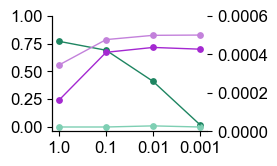

In [50]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(2, 1.5))

# Plot
ax1.scatter(samplings, df_metrics_directed['precision'], s=15, label='directed', c='#1e8561')
ax1.plot(samplings, df_metrics_directed['precision'], linewidth=1, c='#1e8561')

ax1.scatter(samplings, df_metrics_random['precision'], s=15, label='random', c='#7ecfb3')
ax1.plot(samplings, df_metrics_random['precision'], linewidth=1, c='#7ecfb3')

ax1.set_yticks([0, 0.25, 0.5, 0.75, 1])

# Second y-axis
ax2 = ax1.twinx()

# Plot
ax2.scatter(samplings, df_metrics_directed['fraction_exp'], s=15, label='directed', c='#a428d1')
ax2.plot(samplings, df_metrics_directed['fraction_exp'], linewidth=1, c='#a428d1')

ax2.scatter(samplings, df_metrics_random['fraction_exp'], s=15, label='random', c='#c381db')
ax2.plot(samplings, df_metrics_random['fraction_exp'], linewidth=1, c='#c381db')

ax2.set_yticks([0, 0.0002, 0.0004, 0.0006])

#ax.set_xlim(0, 10)
#ax.set_ylim(-1, 1)

#plt.yticks([0, 0.25, 0.5, 0.75, 1])

#plt.xlabel('Training Data Sampling')
#plt.ylabel('Precision')

sns.despine()
plt.savefig('Sampling_vs_precision_vs_efficiency.svg')

---


In [41]:
res_depth_long = []

for sampling_i, sampling in enumerate(samplings):
    dfx = df_seqs_directed[sampling_i]
    for i in range(0, len(dfx)):
        res_depth_long.append([dfx.iloc[i]['depth'], dfx.iloc[i]['muts'], samplings[sampling_i]])

df_res_depth_long = pd.DataFrame(res_depth_long, columns=['depth', 'distance', 'sampling'])

<Axes: xlabel='sampling', ylabel='depth'>

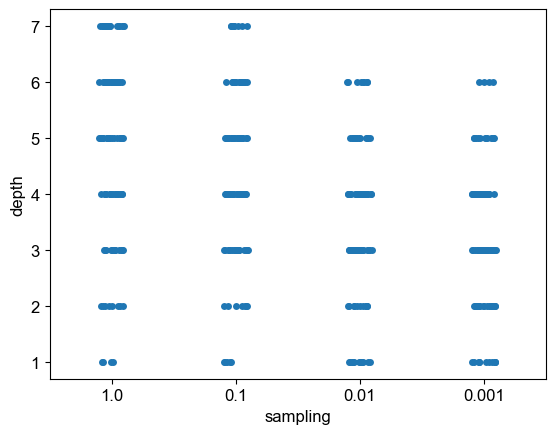

In [44]:
sns.stripplot(data=df_res_depth_long, x='sampling', y='depth')

In [56]:
res_depth_wide = np.zeros((8, 4))

In [57]:
res_depth_wide

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [58]:
for sampling_i, sampling in enumerate(samplings):
    dfx = df_seqs_directed[sampling_i]
    for i in range(0, len(dfx)):
        depth, muts = dfx.iloc[i]['depth'], dfx.iloc[i]['muts']
        res_depth_wide[depth][sampling_i] += 1

#df_res_depth_long = pd.DataFrame(res_depth_long, columns=['depth', 'distance', 'sampling'])

In [ ]:
df_res_depth_wide = pd.DataFrame(res_depth_wide)
df_res_depth_wide = df_res_depth_wide.loc[]

<Axes: >

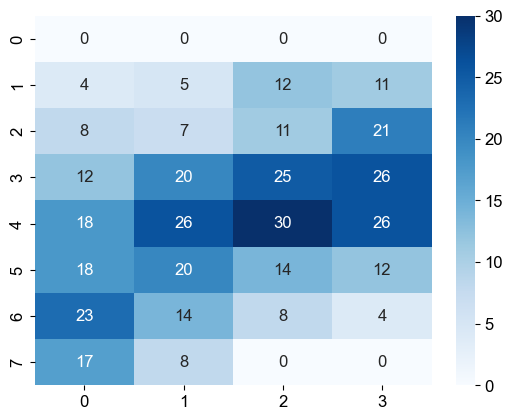

In [62]:
sns.heatmap(, cmap='Blues', annot=True)